## Importing Data

In [44]:
### Import data
import h5py
import numpy as np

# Specify file path
file_path = r"C:\Users\nnaga\Downloads\bird_spectrograms.hdf5"

# Open the file
f = h5py.File(file_path, 'r')

# Print keys (12 species)
print(list(f.keys()))  

['amecro', 'amerob', 'bewwre', 'bkcchi', 'daejun', 'houfin', 'houspa', 'norfli', 'rewbla', 'sonspa', 'spotow', 'whcspa']


### Binary Classification: Test Models

In [45]:
### Saving smaller sample for testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import numpy as np

# Define file and species
species1 = 'amecro'
species2 = 'whcspa'
samples_per_class = 30  # Smaller sample for testing

# Extract and transpose a limited number of samples
X1 = np.transpose(f[species1][:, :, :samples_per_class], (2, 0, 1))  # (30, 128, 517)
X2 = np.transpose(f[species2][:, :, :samples_per_class], (2, 0, 1))  # (30, 128, 517)

# Create feature and label arrays
X = np.concatenate((X1, X2), axis=0)  # Shape: (60, 128, 517)
y = np.concatenate((np.ones(X1.shape[0]), np.zeros(X2.shape[0])))  # Shape: (60,)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=13)

# Convert labels to binary class format
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

# Check final shapes
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(40, 128, 517) (40, 1)
(20, 128, 517) (20, 1)


In [46]:
### Optimal Model -------------------------------------------------------------------------
### Define Nerual Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    # detects patterns in images
        # 32 filters, 3x3 kernel, ReLU activation, input shape (height, width, channel)
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 517, 1)),
    # reduce dimensionality
    MaxPooling2D(pool_size=(2, 2)),

    # more complex features (increase to 64 filters)
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # converts multi dimensional space to 1D vector
    Flatten(),
    # hidden layer
    Dense(64, activation='relu'),
    # dropout later 50% nodes randomly dropped
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary output
])

### Compile Neural Network Model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Train Neural Network Model
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, callbacks=[early_stopping])

# evaluate model
score = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1]*100))

Epoch 1/50


C:\Users\nnaga\miniconda3\envs\myenvname\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 418ms/step - accuracy: 0.5833 - loss: 746.0034 - val_accuracy: 0.5000 - val_loss: 343.0436
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - accuracy: 0.3750 - loss: 502.6255 - val_accuracy: 0.5000 - val_loss: 5.0031
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 290ms/step - accuracy: 0.5833 - loss: 16.9146 - val_accuracy: 0.5000 - val_loss: 7.4191
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 278ms/step - accuracy: 0.5417 - loss: 12.9333 - val_accuracy: 0.5000 - val_loss: 2.1837
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 271ms/step - accuracy: 0.8750 - loss: 0.3236 - val_accuracy: 0.5000 - val_loss: 4.7260
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - accuracy: 0.6042 - loss: 5.7092 - val_accuracy: 0.6250 - val_loss: 0.9324
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - accuracy: 0.8958 - loss: 0.2735 - val_accuracy: 0.6250 - val_loss: 0.6913
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - accuracy: 0.9375 - loss: 0.1850 - val_accuracy: 0.6250 - val_loss: 0.

In [47]:
### Higher Convolutional Layers -------------------------------------------------------------------------
### Define Nerual Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    # detects patterns in images
        # 32 filters, 3x3 kernel, ReLU activation, input shape (height, width, channel)
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 517, 1)),
    # reduce dimensionality
    MaxPooling2D(pool_size=(2, 2)),

    # more complex features (increase to 64 filters)
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # more complex features (increase to 128 filters)
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),


    # converts multi dimensional space to 1D vector
    Flatten(),
    # hidden layer
    Dense(64, activation='relu'),
    # dropout later 50% nodes randomly dropped
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary output
])

### Compile Neural Network Model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Train Neural Network Model
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, callbacks=[early_stopping])

# evaluate model
score = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1]*100))

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 466ms/step - accuracy: 0.4375 - loss: 91.9443 - val_accuracy: 0.5000 - val_loss: 193.0836
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 318ms/step - accuracy: 0.5208 - loss: 102.7742 - val_accuracy: 0.5000 - val_loss: 12.1678
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 331ms/step - accuracy: 0.6250 - loss: 4.4801 - val_accuracy: 0.5000 - val_loss: 1.3089
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 350ms/step - accuracy: 0.5000 - loss: 1.4742 - val_accuracy: 0.5000 - val_loss: 4.7945
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 337ms/step - accuracy: 0.3958 - loss: 4.6200 - val_accuracy: 0.5000 - val_loss: 10.6019
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 345ms/step - accuracy: 0.5417 - loss: 6.4378 - val_accuracy: 0.5000 - val_loss: 0.7819
Test Accuracy: 50.00%


In [48]:
### Smaller Kernel -------------------------------------------------------------------------
### Define Nerual Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    # detects patterns in images
        # 32 filters, 2x2 kernel, ReLU activation, input shape (height, width, channel)
    Conv2D(32, (2, 2), activation='relu', input_shape=(128, 517, 1)),
    # reduce dimensionality
    MaxPooling2D(pool_size=(2, 2)),

    # more complex features (increase to 64 filters)
    Conv2D(64, (2, 2), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # converts multi dimensional space to 1D vector
    Flatten(),
    # hidden layer
    Dense(64, activation='relu'),
    # dropout later 50% nodes randomly dropped
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary output
])

### Compile Neural Network Model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Train Neural Network Model
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, callbacks=[early_stopping])

# evaluate model
score = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1]*100))

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 399ms/step - accuracy: 0.4583 - loss: 262.3076 - val_accuracy: 0.5000 - val_loss: 922.1490
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.5625 - loss: 691.7305 - val_accuracy: 0.5000 - val_loss: 140.4844
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - accuracy: 0.5417 - loss: 189.1201 - val_accuracy: 0.5000 - val_loss: 105.6876
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 238ms/step - accuracy: 0.6458 - loss: 76.7121 - val_accuracy: 0.5000 - val_loss: 9.6684
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - accuracy: 0.6458 - loss: 27.8565 - val_accuracy: 0.5000 - val_loss: 66.8473
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - accuracy: 0.5000 - loss: 48.5336 - val_accuracy: 0.5000 - val_loss: 17.0734
Test Accuracy: 50.00%


In [49]:
### Reduce Dropout -------------------------------------------------------------------------
### Define Nerual Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    # detects patterns in images
        # 32 filters, 3x3 kernel, ReLU activation, input shape (height, width, channel)
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 517, 1)),
    # reduce dimensionality
    MaxPooling2D(pool_size=(2, 2)),

    # more complex features (increase to 64 filters)
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # more complex features (increase to 128 filters)
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),


    # converts multi dimensional space to 1D vector
    Flatten(),
    # hidden layer
    Dense(128, activation='relu'),
    # dropout later 50% nodes randomly dropped
    Dropout(0.4),
    Dense(1, activation='sigmoid')  # Binary output
])

### Compile Neural Network Model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Train Neural Network Model
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, callbacks=[early_stopping])

# evaluate model
score = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1]*100))

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 454ms/step - accuracy: 0.4792 - loss: 292.2127 - val_accuracy: 0.5000 - val_loss: 260.8574
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 326ms/step - accuracy: 0.5625 - loss: 168.6372 - val_accuracy: 0.5000 - val_loss: 60.5272
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 341ms/step - accuracy: 0.5208 - loss: 28.0645 - val_accuracy: 0.5000 - val_loss: 2.3665
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 335ms/step - accuracy: 0.4375 - loss: 13.2114 - val_accuracy: 0.5000 - val_loss: 3.0492
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 350ms/step - accuracy: 0.5625 - loss: 2.4040 - val_accuracy: 0.5000 - val_loss: 1.3699
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 347ms/step - accuracy: 0.4167 - loss: 4.2204 - val_accuracy: 0.5000 - val_loss: 2.3499
Test Accuracy: 50.00%


### Comparing Binary Models

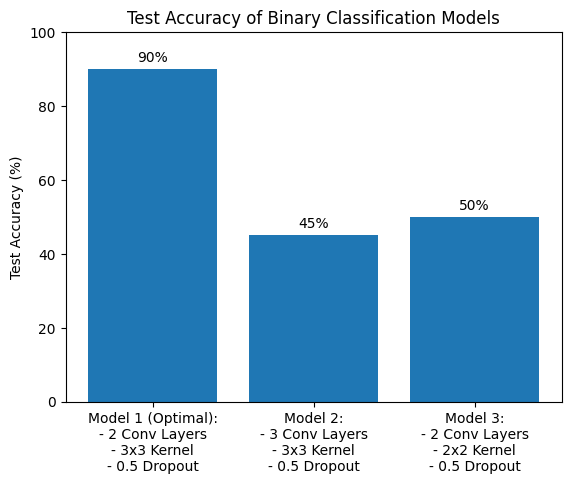

In [50]:
import matplotlib.pyplot as plt

# Test accuracies
models = [
    'Model 1 (Optimal):\n- 2 Conv Layers\n- 3x3 Kernel\n- 0.5 Dropout',
    'Model 2:\n- 3 Conv Layers\n- 3x3 Kernel\n- 0.5 Dropout',
    'Model 3:\n- 2 Conv Layers\n- 2x2 Kernel\n- 0.5 Dropout'
]
accuracies = [90.0, 45.0, 50.0] 

# Create bar plot
plt.bar(models, accuracies)
plt.ylabel('Test Accuracy (%)')
plt.title('Test Accuracy of Binary Classification Models')
plt.ylim(0, 100)

# Add accuracy values
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 2, f'{acc:.0f}%', ha='center')

plt.show()

### Multi- Class Classification

In [11]:
### Saving smaller sample for testing
import h5py
import numpy as np

# Specify file path
file_path = r"C:\Users\nnaga\Downloads\bird_spectrograms.hdf5"

# Open the file
f = h5py.File(file_path, 'r')

# Define all species
species_list = ['amecro', 'amerob', 'bewwre', 'bkcchi', 'daejun', 'houfin', 
                'houspa', 'norfli', 'rewbla', 'sonspa', 'spotow', 'whcspa']

# Sample size per class
samples_per_class = 30  # Adjust as needed

# Initialize lists
X = []
y = []

# Loop through species to collect limited data
for i, species in enumerate(species_list):
    dset = f[species]
    print(f"{species}: original shape {dset.shape}")

    available_samples = dset.shape[2]
    use_samples = min(samples_per_class, available_samples)

    X_species = np.transpose(dset[:, :, :use_samples], (2, 0, 1))
    X.append(X_species)
    y.append(np.full(use_samples, i))

# Convert lists to numpy arrays
X = np.concatenate(X, axis=0)
y = np.concatenate(y, axis=0)

### Split into Train Test Split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

# train/test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=13)

# Convert target variable to binary class
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

# Check final shapes
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

amecro: original shape (128, 517, 66)
amerob: original shape (128, 517, 172)
bewwre: original shape (128, 517, 144)
bkcchi: original shape (128, 517, 45)
daejun: original shape (128, 517, 125)
houfin: original shape (128, 517, 84)
houspa: original shape (128, 517, 630)
norfli: original shape (128, 517, 37)
rewbla: original shape (128, 517, 187)
sonspa: original shape (128, 517, 263)
spotow: original shape (128, 517, 137)
whcspa: original shape (128, 517, 91)
(241, 128, 517) (241, 12)
(119, 128, 517) (119, 12)


In [12]:
### Optimal Model ---------------------------------------------------------------------
### Define Multi-Class Neural Netowrk
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 517, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(12, activation='softmax')  # Output layer for multi class
])

### Compile Multi-Class Neural Netowrk
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Multi-class loss function
              metrics=['accuracy'])

### Train Multi-Class Neural Network
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)
history = model.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=16,
                    validation_split=0.2,
                    callbacks=[early_stopping])

# evaluate model
score = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1]*100))

C:\Users\nnaga\miniconda3\envs\myenvname\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 938ms/step - accuracy: 0.1249 - loss: 79.0824 - val_accuracy: 0.0000e+00 - val_loss: 2.7234
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 838ms/step - accuracy: 0.1030 - loss: 2.6085 - val_accuracy: 0.1224 - val_loss: 2.4966
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 840ms/step - accuracy: 0.1723 - loss: 2.4845 - val_accuracy: 0.1429 - val_loss: 2.4292
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 784ms/step - accuracy: 0.3424 - loss: 2.3140 - val_accuracy: 0.2245 - val_loss: 2.3440
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 824ms/step - accuracy: 0.3814 - loss: 1.9761 - val_accuracy: 0.2041 - val_loss: 2.3512
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 764ms/step - accuracy: 0.5446 - loss: 1.5310 - val_accuracy: 0.2245 - val_loss: 2.8696
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 881ms/step - accuracy: 0.6661 - loss: 1.4137 - val_accuracy: 0.1837 - val_loss: 3.3580
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 805ms/step - accuracy: 0.7890 - loss: 0.8328 - val_a

In [13]:
### Higher dropout ---------------------------------------------------------------------
### Define Multi-Class Neural Netowrk
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 517, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(12, activation='softmax')  # Output layer for multi class
])

### Compile Multi-Class Neural Netowrk
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Multi-class loss function
              metrics=['accuracy'])

### Train Multi-Class Neural Network
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)
history = model.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=16,
                    validation_split=0.2,
                    callbacks=[early_stopping])

# evaluate model
score = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1]*100))

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 672ms/step - accuracy: 0.0679 - loss: 213.7186 - val_accuracy: 0.0204 - val_loss: 2.5757
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 563ms/step - accuracy: 0.0796 - loss: 2.4687 - val_accuracy: 0.0408 - val_loss: 2.4877
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 516ms/step - accuracy: 0.0709 - loss: 2.5023 - val_accuracy: 0.0408 - val_loss: 2.4912
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 561ms/step - accuracy: 0.0639 - loss: 2.4843 - val_accuracy: 0.0000e+00 - val_loss: 2.4931
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 619ms/step - accuracy: 0.0706 - loss: 2.4846 - val_accuracy: 0.0000e+00 - val_loss: 2.4993
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 581ms/step - accuracy: 0.0854 - loss: 2.4840 - val_accuracy: 0.0000e+00 - val_loss: 2.5018
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 537ms/step - accuracy: 0.0914 - loss: 2.4838 - val_accuracy: 0.0000e+00 - val_loss: 2.5023
Test Accuracy: 9.24%


In [14]:
### More Convolutional Layers ---------------------------------------------------------------------
### Define Multi-Class Neural Netowrk
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 517, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(12, activation='softmax')  # Output layer for multi class
])

### Compile Multi-Class Neural Netowrk
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Multi-class loss function
              metrics=['accuracy'])

### Train Multi-Class Neural Network
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)
history = model.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=16,
                    validation_split=0.2,
                    callbacks=[early_stopping])

# evaluate model
score = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1]*100))

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 876ms/step - accuracy: 0.0370 - loss: 51.4293 - val_accuracy: 0.1429 - val_loss: 2.5495
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 634ms/step - accuracy: 0.0967 - loss: 2.5396 - val_accuracy: 0.1224 - val_loss: 2.4859
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 771ms/step - accuracy: 0.1687 - loss: 2.4945 - val_accuracy: 0.1224 - val_loss: 2.4858
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 752ms/step - accuracy: 0.1115 - loss: 2.4821 - val_accuracy: 0.1224 - val_loss: 2.4859
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 801ms/step - accuracy: 0.1104 - loss: 2.4986 - val_accuracy: 0.1224 - val_loss: 2.4860
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 784ms/step - accuracy: 0.1646 - loss: 2.4733 - val_accuracy: 0.1020 - val_loss: 2.4883
Test Accuracy: 6.72%


In [15]:
### Reduced Dropout ---------------------------------------------------------------------
### Define Multi-Class Neural Netowrk
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 517, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(12, activation='softmax')  # Output layer for multi class
])

### Compile Multi-Class Neural Netowrk
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Multi-class loss function
              metrics=['accuracy'])

### Train Multi-Class Neural Network
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)
history = model.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=16,
                    validation_split=0.2,
                    callbacks=[early_stopping])

# evaluate model
score = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1]*100))

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 965ms/step - accuracy: 0.0450 - loss: 86.1670 - val_accuracy: 0.0612 - val_loss: 2.6645
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 883ms/step - accuracy: 0.0821 - loss: 2.5773 - val_accuracy: 0.0408 - val_loss: 2.4865
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 827ms/step - accuracy: 0.2304 - loss: 2.4818 - val_accuracy: 0.0612 - val_loss: 2.5009
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 505ms/step - accuracy: 0.0952 - loss: 2.4791 - val_accuracy: 0.0408 - val_loss: 2.5428
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 419ms/step - accuracy: 0.1621 - loss: 2.4765 - val_accuracy: 0.0612 - val_loss: 2.5486
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 437ms/step - accuracy: 0.1840 - loss: 2.4545 - val_accuracy: 0.0000e+00 - val_loss: 2.5355
Test Accuracy: 9.24%


In [16]:
### Reduced Dropout, Less layers---------------------------------------------------------------------
### Define Multi-Class Neural Netowrk
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 517, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.25),
    Dense(12, activation='softmax')  # Output layer for multi class
])

### Compile Multi-Class Neural Netowrk
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Multi-class loss function
              metrics=['accuracy'])

### Train Multi-Class Neural Network
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)
history = model.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=16,
                    validation_split=0.2,
                    callbacks=[early_stopping])

# evaluate model
score = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1]*100))

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 365ms/step - accuracy: 0.0589 - loss: 335.2446 - val_accuracy: 0.1020 - val_loss: 9.6310
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 554ms/step - accuracy: 0.0679 - loss: 4.8006 - val_accuracy: 0.1020 - val_loss: 2.4773
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 509ms/step - accuracy: 0.0845 - loss: 2.4897 - val_accuracy: 0.0612 - val_loss: 2.4592
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 500ms/step - accuracy: 0.1325 - loss: 2.4507 - val_accuracy: 0.1020 - val_loss: 6.1081
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 400ms/step - accuracy: 0.1780 - loss: 2.8816 - val_accuracy: 0.1429 - val_loss: 2.4915
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 321ms/step - accuracy: 0.3240 - loss: 1.9934 - val_accuracy: 0.2041 - val_loss: 2.5357
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 332ms/step - accuracy: 0.5226 - loss: 1.6189 - val_accuracy: 0.0612 - val_loss: 3.1312
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 345ms/step - accuracy: 0.5699 - loss: 1.5250 - val_accuracy:

### Comparing Multi-class Models

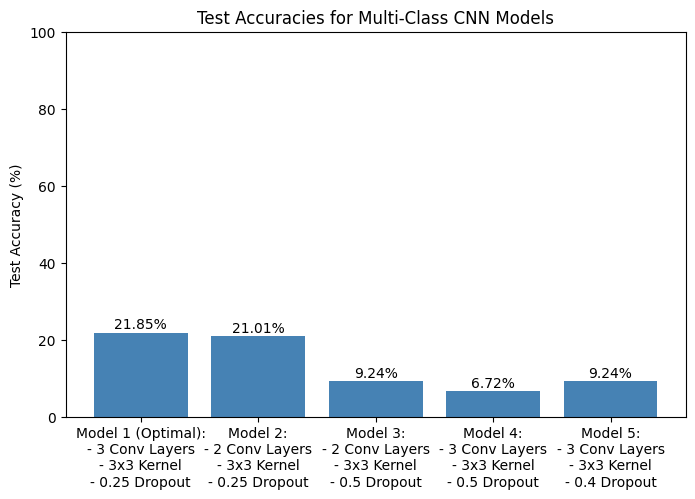

In [19]:
import matplotlib.pyplot as plt

# Model names
models = [
    'Model 1 (Optimal):\n- 3 Conv Layers\n- 3x3 Kernel\n- 0.25 Dropout',
    'Model 2:\n- 2 Conv Layers\n- 3x3 Kernel\n- 0.25 Dropout',
    'Model 3:\n- 2 Conv Layers\n- 3x3 Kernel\n- 0.5 Dropout',
    'Model 4:\n- 3 Conv Layers\n- 3x3 Kernel\n- 0.5 Dropout',
    'Model 5:\n- 3 Conv Layers\n- 3x3 Kernel\n- 0.4 Dropout'
]

# Corresponding test accuracies in percent 
accuracies = [21.85, 21.01, 9.24, 6.72, 9.24]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color='steelblue')
plt.ylabel('Test Accuracy (%)')
plt.title('Test Accuracies for Multi-Class CNN Models')
plt.ylim(0, 100)

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 1, f'{acc:.2f}%', ha='center')

plt.show()